Chapter 3 Simple Logistic Regression

reference : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/Social_Network_Ads.csv

Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล

In [3]:
url = 'https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/Social_Network_Ads.csv'
df=pd.read_csv(url)
df.sample(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
158,15762605,Male,26,30000,0
342,15717560,Female,38,65000,0
276,15734312,Male,38,71000,0
138,15610403,Female,28,59000,0
225,15622171,Male,37,53000,0
198,15745083,Male,26,80000,0
294,15566689,Female,35,57000,0


ทดลองดูภาพรวมของข้อมูลได้ดังนี้


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


จากภาพรวมข้อมูลจะเห็นว่าข้อมูลชุดนี้ประกอบด้วย 400 ตัวอย่างของข้อมูล  

เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

ในตัวอย่างนี้เลือกพิจารณาความสัมพันธ์ระหว่าง ความน่าจะเป็นในการซื้อข้อ (Purchased) กับ อายุของผู้ซื้อ (Age) เพื่อทำการสร้างเเบบจำลองเพื่อเเยกประเภทของบุคคลที่สามารถชำระหนี้บัตรเครดิตได้

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x360 with 0 Axes>

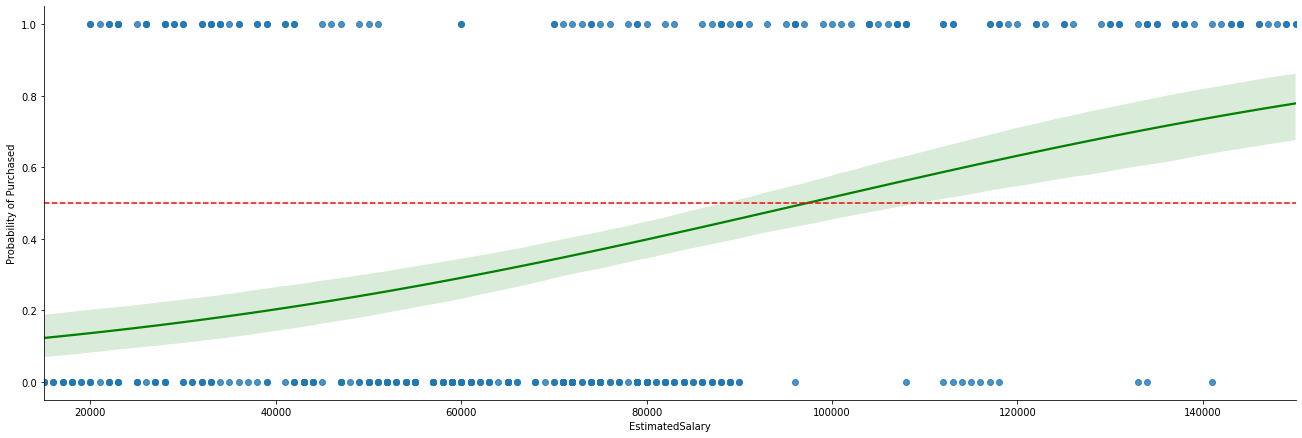

In [ ]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='EstimatedSalary', y='Purchased', data=df,
           logistic=True, height=6, aspect=3, 
           line_kws={'color': 'green'})
plt.ylabel('Probability of Purchased')
plt.axhline(.5, color='red', linestyle='--');

โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้ 

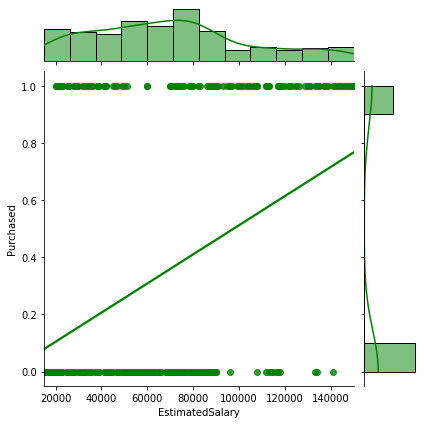

In [ ]:
sns.jointplot(x='EstimatedSalary', y='Purchased', data=df, kind='reg', ci=None,
              color='green');

**สร้าง Logistic Regression model โดยใช้ library ของ scikit learn**

นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['EstimatedSalary']]
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train

,EstimatedSalary
373,130000
29,18000
336,144000
270,133000
69,68000
...,...
87,85000
119,59000
372,73000
38,72000


In [ ]:
model = LogisticRegression() # สร้าง object ชื่อ model จาก class ของ LogisticRegression class 
model.fit(X_train, y_train)  # สร้าง model LogisticRegression จากข้อมูล X เเละ Y

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

ทดลองเเสดงค่า intercept ($\theta_{0}$) เเละ coefficient ($\theta_{1}$) เมื่อ

$$ y =\frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x_i)}} = \frac{1}{1 + e^{-\theta_{0} -\theta_{1}x_i}} $$ 

โดยที่ cost function คือ

$J(\theta) = \sum_{(x,y)\in D} -y \cdot log(y_{pred}) - (1 - y) \cdot log(1 - y_{pred})$

In [ ]:
# intercept 
print(f'intercept = {model.intercept_}') 
# coefficient
print(f'coefficient = {model.coef_}') 

intercept = [-2.20696558e-10]
coefficient = [[-3.06345877e-06]]


ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
model.score(X_train, y_train) # accuracy of the model

0.6464285714285715

In [ ]:
# model.score(X_test, y_test) # accuracy of the model

K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.model_selection import cross_val_score
from numpy import mean, std
# from numpy import std

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.646 (0.048)


In [ ]:
scores 

array([0.625     , 0.64285714, 0.71428571, 0.57142857, 0.67857143])

ทดลองการทำนายค่าโดยทำได้ดังนี้


In [ ]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
159,1,0
321,1,0
320,1,0
22,1,0
301,1,0
307,1,0
264,1,0
258,1,0
308,1,0
19,1,0


In [ ]:
len(dx[dx.y_true != dx.y_pred])

44

In [ ]:
dx[dx.y_true == dx.y_pred]

,y_true,y_pred
111,0,0
14,0,0
50,0,0
203,0,0
37,0,0
...,...,...
72,0,0
209,0,0
335,0,0
42,0,0


วัดประสิทธิภาพด้วย Confusion matrix

In [ ]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print(f'true negative = {tn}')
print(f'false positive = {fp}')
print(f'false negative = {fn}')
print(f'true positive = {tp}')

true negative = 76
false positive = 0
false negative = 44
true positive = 0


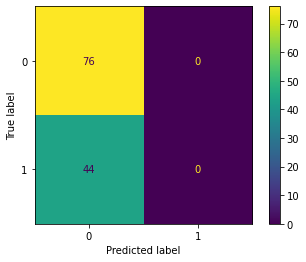

In [ ]:
metrics.plot_confusion_matrix(model, X_test, y_test)

ในอีกทางนึง การพิจาณาประสิทธิภาพของแบบจำลองสามารถทำได้โดยใช้พารามิเตอร์ดังต่อไปนี้

$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}} 
$$

In [ ]:
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')
print(f'precision = {metrics.precision_score(y_test, predicted)}')
print(f'recall = {metrics.recall_score(y_test, predicted)}')

accuracy = 0.6333333333333333
precision = 0.0
recall = 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Multiple Logistic Regression**

In [ ]:
df=pd.read_csv(url, usecols=list(range(2, 5)))
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

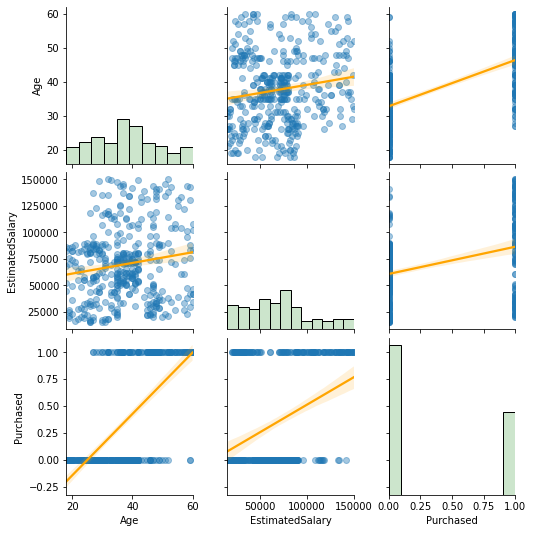

In [ ]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

สร้าง multiple logistic regression model 

In [ ]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
X

In [ ]:
mplo = LogisticRegression() 
mplo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

ทดลองเเสดงค่า intercept คือ $\theta _{0}$, $\theta _{1}$ และ  $\theta _{2}$  

In [ ]:
# intercept 
print(f'intercept = {mplo.intercept_}') # theta0
# coefficient
print(f'coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = [-2.11680439e-10]
coefficient = [[-1.68770369e-09 -2.48576798e-06]]


ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
print(f'R_squared_error_training = {R_squred_train}')

R_squared_error_training = 0.634375


In [ ]:
# R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
# print(f'R_squared_error_training = {R_squred_train}') 
# R_squred = mplo.score(X_test, y_test) 
# print(f'R_squared_error = {R_squred}') 

Cross valiation

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.622 (0.055)


ทดลองทำนายผลลัพธ์

In [ ]:
predicted = mplo.predict(X_test)
predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
predicted = mplo.predict(X_test)
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
272,1,0
168,1,0
334,1,0
243,1,0
271,1,0
23,1,0
346,1,0
103,1,0
381,1,0
221,1,0


In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print(f'true negative = {tn}')
print(f'false positive = {fp}')
print(f'false negative = {fn}')
print(f'true positive = {tp}')

true negative = 54
false positive = 0
false negative = 26
true positive = 0


In [ ]:
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')
print(f'precision = {metrics.precision_score(y_test, predicted)}')
print(f'recall = {metrics.recall_score(y_test, predicted)}')

accuracy = 0.675
precision = 0.0
recall = 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
